# Walkthrough: Task Types


`#scikit-learn` `#regression` `#classification` `#clustering` `#anomaly-detection`


> Objectives:
>
> - Use the SciKit-Learn library
> - Fit shallow-learning models to perform a variety of task types


## Standard Deep Atlas Exercise Set Up


- [x] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [x] Apply the standard Deep Atlas environment setup process by running this cell:


In [1]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

🎉 Running in a Virtual environment


## 🚦 Checkpoint: Start

- [x] Run this cell to record your start time:


In [29]:
deep_atlas.log_start_time()

🚀 Success! Get started...


---


## Context


Let's see how machine learning can be applied to various types of tasks.

We will be using the SciKit-Learn library, which provides us with many popular machine learning algorithms. The algorithms are all _shallow learning models_: mathematical functions that are not "deep" multi-layer neural nets, whose parameters can nonetheless be trained.

For each task type, we will:

1. Pick and instantiate an algorithm suited to the task.
2. "Fit" the model to a dataset (i.e. train the model).
3. Perform inference with the fit model.

> Note: There's usually more than one algorithm (or a combination of algorithms) that is capable of being applied to a particular task. Therefore, the code below is _not_ exhaustive when it comes to algorithm selection but _is_ representative of how problems can be solved with ML.

We will explore the following task types:

- Regression
- Classification
- Clustering
- Anomaly Detection


## Imports


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import helpers

Matplotlib is building the font cache; this may take a moment.


## Task: Regression


Regression involves predicting a continuous numerical value, given a set of input features. It's commonly used to model relationships between variables, and forecast outcomes (e.g. predicting house prices or stock market trends).

Regression is a _supervised learning_ task; one where the model is trained on sample inputs with known-good corresponding outputs, a.k.a. labels

Algorithm options include **Linear Regression**, Stochastic Gradient Descent (SGD) Regressor, ensemble regressors like gradient-boosted trees, and Support Vector Machine (SVM) regressors.

- [x] The following cell will create a dataset of 100 samples and corresponding labels.
  - The data represents house sale data:
    - samples contains 2 features: number of bedrooms and square-footage (in 1000s).
    - labels contains the corresponding sale price (in millions)


In [7]:
(
    training_brs_sqft,
    testing_brs_sqft,
    training_sale_prices,
    testing_sale_prices,
) = helpers.generate_home_sale_data()

- [x] Instantiate the model. We will use Linear Regression in this example:
  - The model starts of with untrained parameter values (zeros or random values, depending on the model)


In [8]:
model = LinearRegression()

- [x] Fit the model to the data:
  - This will update the internal parameters so that, given unseen inputs, the model is able to produce predictions (that have a similar relationship to those inputs as the labels did to the training samples).

> Note: SciKit-Learn uses the term "fit" to refer to optimizing the parameters of the ML algorithm. Other libraries may use the term "train". Optimization may be done algebraically when possible (as in Linear Regression) or through iterative strategies like gradient descent.


In [9]:
model.fit(
    # sample input features
    training_brs_sqft,
    # expected output target
    training_sale_prices,
)

LinearRegression()

- [x] Perform inference to produce predictions:


In [10]:
predictions = model.predict(testing_brs_sqft)

- [x] Let's view the test data and resulting predictions by printing them in a Pandas dataframe:
  - Pay attention to the expected outputs and predictions — the difference is the model's error or _loss_.


In [11]:
dataframe = pd.DataFrame(
    {
        "Bedrooms & Sq. Ft.": testing_brs_sqft.tolist(),
        "Expected Price": testing_sale_prices.tolist(),
        "Predicted Price": predictions.tolist(),
    }
)
dataframe["Error"] = (
    dataframe["Expected Price"] - dataframe["Predicted Price"]
)

print(dataframe)

           Bedrooms & Sq. Ft.  Expected Price  Predicted Price     Error
0    [1.0, 1.978475681165901]        2.288058         2.235054  0.053004
1   [1.0, 0.8419027438129125]        1.607224         1.506406  0.100818
2   [3.0, 0.8776734437380462]        3.326081         3.014412  0.311670
3   [3.0, 1.7055081153486717]        3.706550         3.545130  0.161420
4   [1.0, 1.8071908852815766]        2.224534         2.125245  0.099289
5    [3.0, 0.934627179370652]        3.281900         3.050924  0.230976
6   [2.0, 1.3419157963542443]        2.732722         2.569497  0.163225
7   [3.0, 0.8593428360004587]        3.373407         3.002660  0.370747
8   [3.0, 1.4349471902413369]        3.481799         3.371675  0.110124
9   [3.0, 0.7980735223012586]        3.199951         2.963381  0.236571
10  [2.0, 1.2083223877429239]        2.460157         2.483851 -0.023694
11  [2.0, 1.4546156168956705]        2.800758         2.641748  0.159010
12  [2.0, 0.9272607415662014]        2.601831      

## Task: Classification


Classification involves assigning input data into predefined categories or classes. It is used for tasks like spam detection, image categorization, and medical diagnosis, where the goal is to label data as one of several possible categories.

Like regression, classification is a supervised learning task.

Algorithms used for classification include: Naive Bayes, K-Nearest Neighbors, ensemble classifiers like the **Random Forest** classifier, SGD classifiers.

- [x] Let's generate data for this classification example:
  - We will classify information about a cancer's size and cell density into two classes: benign or malignant.


In [12]:
(
    training_size_density,
    testing_size_density,
    training_labels,
    testing_labels,
) = helpers.generate_cancer_data()

- [x] Instantiate the model:


In [13]:
model = RandomForestClassifier(n_estimators=10, random_state=42)

- [x] Fit the model to the data:


In [14]:
model.fit(training_size_density, training_labels)

RandomForestClassifier(n_estimators=10, random_state=42)

- [x] Perform inference:


In [15]:
classifications = model.predict(testing_size_density)

- [x] View the results:


In [16]:
dataframe = pd.DataFrame({
  "Size & Density": testing_size_density.tolist(),
  "Label ": testing_labels.tolist(),
  "Prediction ": classifications.tolist(),
});
dataframe["Correct?"] = dataframe["Label "] == dataframe["Prediction "];
print(dataframe);


               Size & Density  Label   Prediction   Correct?
0    [1.0, 4.942601816442403]       1            1      True
1   [1.0, 1.9117406501677667]       0            0      True
2   [3.0, 2.0071291833014566]       0            0      True
3    [3.0, 4.214688307596457]       1            1      True
4    [1.0, 4.485842360750871]       1            1      True
5    [3.0, 2.159005811655072]       0            0      True
6    [2.0, 3.245108790277985]       1            0     False
7   [3.0, 1.9582475626678897]       0            0      True
8   [3.0, 3.4931925073102317]       1            1      True
9   [3.0, 1.7948627261366896]       0            0      True
10   [2.0, 2.888859700647797]       0            1     False
11  [2.0, 3.5456416450551216]       1            1      True
12  [2.0, 2.1393619775098704]       0            0      True
13  [2.0, 4.6302658957043725]       1            0     False
14   [1.0, 3.529223322374318]       0            0      True
15  [1.0, 3.916028672163

## Task: Clustering


Clustering involves grouping a set of input data into clusters, where the data in each cluster are more similar to each other than to those in other clusters. It is used for tasks like customer segmentation, market research, and pattern recognition, where the goal is to identify natural groupings within the data without predefined categories.

Unlike classification and regression, clustering is an _unsupervised learning_ task — labels are not known at the outset and clusters are formed based on the intrinsic structure in the data.

Algorithms used for clustering include: **K-Means**, Hierarchical Clustering, DBSCAN, and Gaussian Mixture Models.

- [x] Generate the data for clustering:
  - In this example, the generated values represent the position of individual bacteria cells on a lab slide.


In [17]:
bacteria_positions, _ = helpers.generate_colony_data()

Because we do not have labels with which to evaluate the model, it helps to visualize the distribution of the data.

- [x] Plot the bacteria positions on a two dimensional plane:


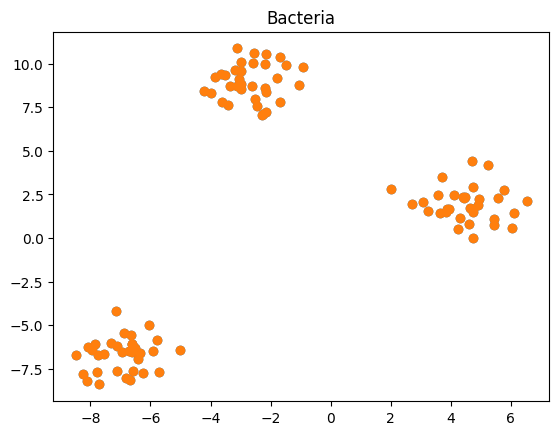

In [18]:
helpers.plot_colony_data(bacteria_positions)

- [x] Instantiate the model:
  - The K-Means algorithm will only create as many clusters as you tell it to, which is why we need to specify `n_clusters` below.


In [19]:
model = KMeans(n_clusters=3)

- [x] Fit the model to the data:


In [20]:
model.fit(bacteria_positions)

KMeans(n_clusters=3)

- [x] Perform inference:
  - For the clustering task, this will assign each data point to a cluster and calculate which data point serves as the cluster's _centroid_ (center-most point).


In [21]:
labels = model.predict(bacteria_positions)

- [x] Visualize the results:
  - The plot below should display each cluster in a distinct color, indicating the assigned, predicted "label" of each cluster.


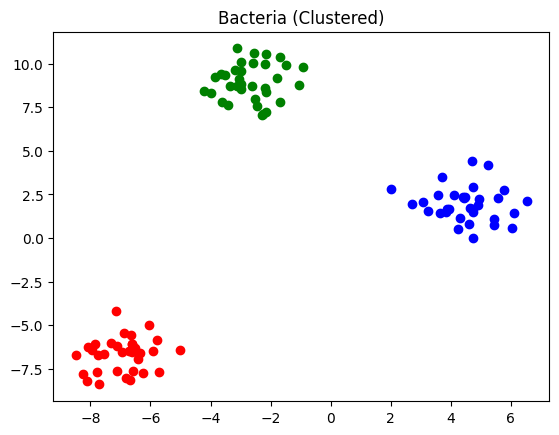

In [22]:
helpers.plot_colony_data(bacteria_positions, labels)

- [x] Try changing `n_clusters` to 2 in the model initialization step and re-running the following cells; note how the clustering model does it's best to produce reasonable clusters.


## Task: Anomaly Detection


Anomaly detection involves identifying data points that deviate significantly from the majority of the data. This task is useful for detecting fraud, identifying network security breaches, or recognizing equipment faults. Unlike supervised classification, anomaly detection typically operates in an unsupervised manner where labels are not known beforehand, and anomalies are identified based on the inherent structure of the data.

Anomaly detection algorithms include: **Isolation Forest**, One-Class SVM, and Local Outlier Factor (LOF).

- [x] Generate the data for anomaly detection:
  - In this example, we generate synthetic data that simulates credit card transactions


In [23]:
X_train, X_test = helpers.generate_credit_card_transactions()

- [x] Visualize the data:


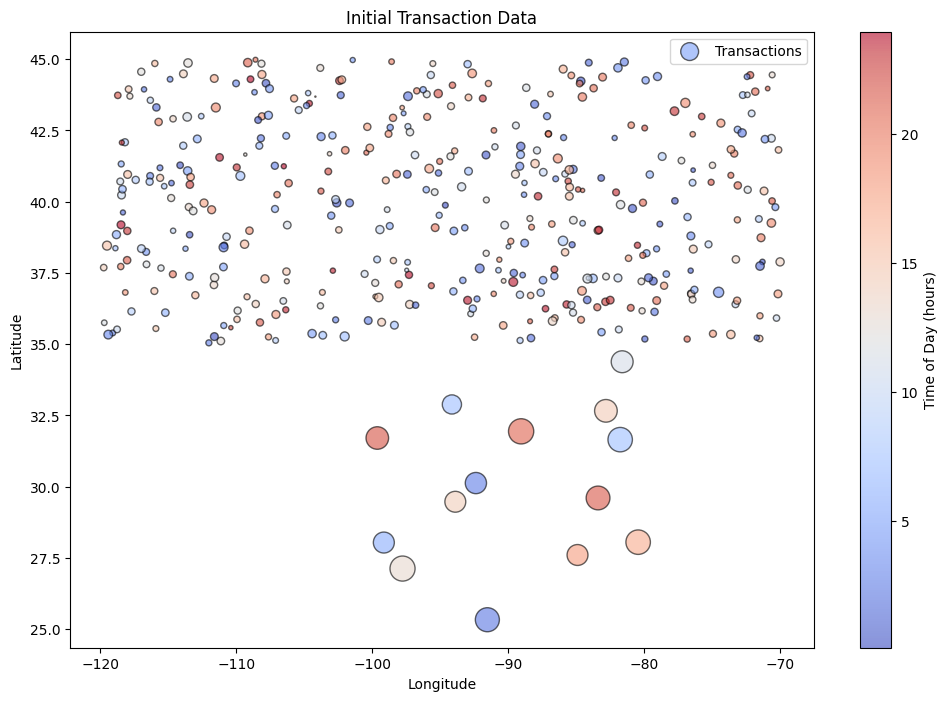

In [24]:
helpers.plot_transactions(X_train, title="Initial Transaction Data")

- [x] Instantiate the Isolation forest model:
  - The primary idea behind Isolation Forest is that anomalous data points can be isolated more easily and quickly than normal data points. Anomalies are more susceptible to isolation because they have feature values that are significantly different from the majority of the data.
  - We can suggest how many examples in the data are anomalous using the `contamination` argument. Adjustments to this parameter will adjust the sensitivity of the model.


In [25]:
model = IsolationForest(
    contamination=0.04, random_state=42
)  # suggest that 4% of data is outliers

- [x] Fit the model to the available data:


In [26]:
model.fit(X_train)

IsolationForest(contamination=0.04, random_state=42)

- [x] Perform inference:
  - The model will classify each data point as either normal or an anomaly.


In [27]:
predictions = model.predict(X_test)

- [x] Visualize the results:
  - Anomalies will be highlighted in a different color to show which transaction are unusual.


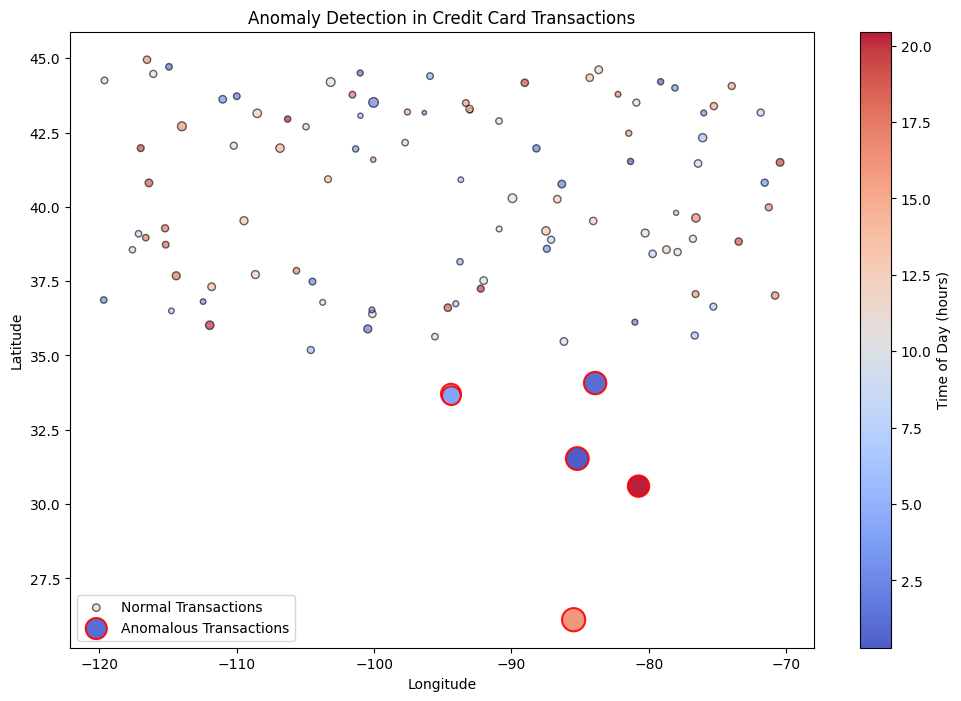

In [28]:
helpers.plot_transactions(
    X_test,
    predictions=predictions,
    title="Anomaly Detection in Credit Card Transactions",
    show_anomalies=True,
)

### 🚦 Checkpoint: Stop

- [x] Uncomment this code
- [x] Complete the feedback form
- [x] Run the cell to log your responses and record your stop time:


In [ ]:
# deep_atlas.log_feedback(
#     {
#         # How long were you actively focused on this section? (HH:MM)
#         "active_time": 20 min
#         # Did you feel finished with this section (Yes/No):
#         "finished": yes
#         # How much did you enjoy this section? (1–5)
#         "enjoyment": 3,
#         # How useful was this section? (1–5)
#         "usefulness": 4
#         # Did you skip any steps?
#         "skipped_steps": no,
#         # Any obvious opportunities for improvement?
#         "suggestions": no,
#     }
# )
# deep_atlas.log_stop_time()

## You did it!


In this walkthrough, we got a sense for how ML applications can be categorized into various task types (e.g. regression, classification, clustering, anomaly detection, recommendation, generation, and more).

Each task type can be addressed by implementing particular models or algorithms (and in the case of deep learning, architectures of neural networks)

In the most fundamental terms, the model development lifecycle involves:

1. **Sourcing data** for training, and applying analysis / cleaning / engineering steps to prepare it.
2. **Selecting the appropriate model** for the task (through research or experimentation).
3. **Training the model** to the data (a.k.a fitting), through algorithmic or iterative optimization.
4. **Performing inference** (create predictions) with the trained model and assessing the quality of the predictions.

In upcoming exercises, we will build more sophistication into the process of training models.
